(695.4462960551257, 34.92937265849759, 891.3479110843448, 252.6599416853694, 261.6373015095097, 538.4252824317192, 557.940795068052, 40.487249106129354, 363.7455242842088, 653.2662338634934, 386.61318601687736, 625.4810253623573, 36.12472130415075, 756.930798254932, 451.39510122394904, 629.4264381061366, 110.48094634537958, 285.58064941298585, 384.4115911509187, 796.213823738691, 131.4430891672153, 984.6242297617565, 164.35222940320895, 430.6789914055904, 239.96384526680296, 802.7286069667888, 1.2546112918232226, 953.9263648522888, 471.77705487712046, 660.0332415412502, 284.14290891424173, 482.7510876137247, 936.4438369138275, 284.78783192139133, 930.0513991537919, 35.10715194816761, 731.5306118458169, 51.50672661589251, 432.6173165942535, 392.99209114992135, 758.0496728217767, 986.8830232144884, 479.40334997262266, 729.0569745234491, 990.7476343561049, 541.2912218212949, 431.85818374262817, 904.7649013254767, 274.464647955262, 11.335490604343677, 562.2485364780925, 342.062505857512, 6

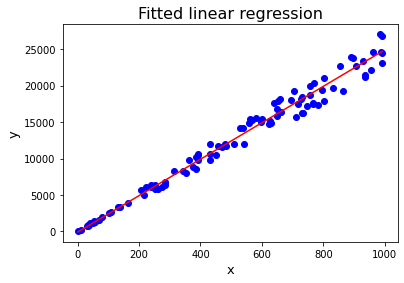

In [ ]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import random
# let's create a linear function with some error called f
def f(x):
    res = x* 25 + 3
    error = res * random.uniform(-0.12, 0.12) # you can play with the error to see how it affects the result
    return res + error

values = []
# now using f we are going to create 300 values.
for i in range(0, 100):
    x = random.uniform(1, 1000)
    y = f(x)
    values.append((x, y))
    regr = linear_model.LinearRegression()
# split the values into two series instead a list of tuples
x, y = zip(*values)
print(x)
print(y)
max_x = max(x)
min_x = min(x)

# split the values in training and test data.
#x_val=np.array(x[:-20])
#train_data_X=np.matrix(x_val.reshape(len(x_val),1))
train_data_X = list(map(lambda x: [x], list(x[:-20])))
train_data_Y = list(y[:-20])
#x_val=np.array(x[-20:])
#test_data_X=np.matrix(x_val.reshape(len(x_val),1))
test_data_X = list(map(lambda x: [x], list(x[-20:])))
test_data_Y = list(y[-20:])

# feed the linear regression with the train data to obtain a model.
regr.fit(train_data_X, train_data_Y)
# check that the coeffients are the expected ones.
m = regr.coef_[0]
b = regr.intercept_
print(' y = {0} * x + {1}'.format(m, b))

# now we are going to plot the points and the model obtained
plt.scatter(x, y, color='blue')  # you can use test_data_X and test_data_Y instead.
plt.plot([min_x, max_x], [b, m*max_x + b], 'r')
plt.title('Fitted linear regression', fontsize=16)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)


# The mean squared error
print("Mean squared error: %.2f" % np.mean((regr.predict(test_data_X) - test_data_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_data_X, test_data_Y))